#  8.1 金融数据

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## 8.1.1 数据导入 

In [62]:
import tushare as ts
pro = ts.pro_api('13c62fc6e94c961a37a2816bd73036551e00122be3c051f44c649d2b')
#多个股票
sz = pro.daily(ts_code='000001.SZ', start_date='20200701', end_date='20220301')
sh = pro.daily(ts_code='600000.SH', start_date='20200701', end_date='20220301')
data = pd.DataFrame()
data['000001.SZ']=sz['close']
data['600000.SH']=sh['close']
data['trade_date'] = sz['trade_date']

In [73]:
data['trade_date'] = pd.to_datetime(data['trade_date'])
data.index = data['trade_date']
data= data.drop(['trade_date'],axis=1)
data.head()

,000001.SZ,600000.SH
trade_date,,
2022-03-01,15.92,8.44
2022-02-28,15.75,8.39
2022-02-25,15.90,8.43
2022-02-24,15.91,8.44
2022-02-23,16.19,8.54


## 8.1.2 汇总统计 

In [75]:
data.info() #看每列指标数据类型和个数

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 405 entries, 2022-03-01 to 2020-07-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   000001.SZ  405 non-null    float64
 1   600000.SH  405 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


In [77]:
data.describe().round(2)#描述性统计，保留两位小数

,000001.SZ,600000.SH
count,405.00,405.00
mean,18.94,9.72
std,2.95,0.81
min,13.12,8.39
25%,17.10,9.05
50%,18.46,9.74
75%,21.27,10.30
max,25.01,12.20


## 8.1.3随时间推移的变化

### 绝对变化 

In [80]:
#绝对偏差,两天的收盘价之差
data.diff().head()

,000001.SZ,600000.SH
trade_date,,
2022-03-01,NaN,NaN
2022-02-28,-0.17,-0.05
2022-02-25,0.15,0.04
2022-02-24,0.01,0.01
2022-02-23,0.28,0.10


In [81]:
#俩个指数分别收盘价差均值
data.diff().mean()

000001.SZ   -0.006931
600000.SH    0.005693
dtype: float64

### 相对变化

In [83]:
data.pct_change().round(3).head()#价格相对前一天的变化

,000001.SZ,600000.SH
trade_date,,
2022-03-01,NaN,NaN
2022-02-28,-0.011,-0.006
2022-02-25,0.010,0.005
2022-02-24,0.001,0.001
2022-02-23,0.018,0.012


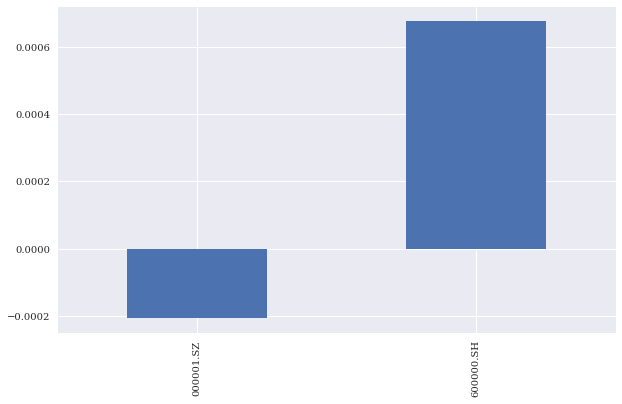

In [84]:
data.pct_change().mean().plot(kind='bar',figsize=(10,6))

### 累计对数回报率

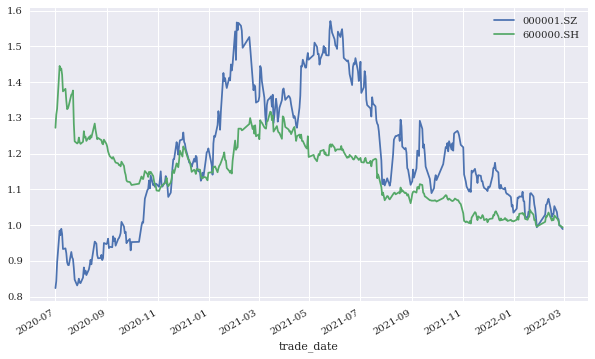

In [85]:
rets = np.log(data/data.shift(1))#以向量的方式计算对数回报率
rets.cumsum().apply(np.exp).plot(figsize=(10,6))#绘制累计对数回报率图表

##  8.1.4重新采样（将分钟数据变成小时，或者将日数据按周或月取样）

In [86]:
data.resample('1w',label='right').last().head()#日数据按一周为时间间隔重新取样

,000001.SZ,600000.SH
trade_date,,
2020-07-05,14.25,11.19
2020-07-12,14.86,11.60
2020-07-19,14.14,11.27
2020-07-26,13.50,10.42
2020-08-02,13.34,10.36


In [88]:
data.resample('1m',label='right').last().head()

,000001.SZ,600000.SH
trade_date,,
2020-07-31,13.34,10.36
2020-08-31,15.08,10.36
2020-09-30,15.17,9.39
2020-10-31,17.75,9.26
2020-11-30,19.74,10.06


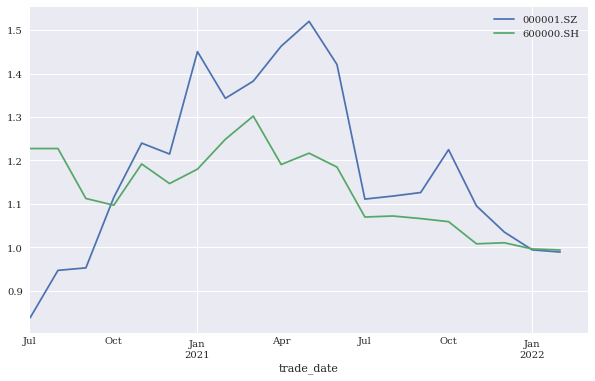

In [90]:
rets.cumsum().apply(np.exp).resample('1m',label='right').last().plot(figsize=(10,6))#对日累计对数回报率按月为间隔采样

# 8.2 滚动统计
（滚动计算又称连续计算或永续计算,是指在编制报告时,将计算期与会计年度脱离开,随着计算的执行不断延伸补充计算,逐期向后滚动,使计算期始终保持为一个固定期间的一种报告编制方法）

In [92]:
data_sz = pd.DataFrame(data['000001.SZ'])
data_sz.head()

,000001.SZ
trade_date,
2022-03-01,15.92
2022-02-28,15.75
2022-02-25,15.90
2022-02-24,15.91
2022-02-23,16.19


## 8.2.1 七个滚动计算概述

In [96]:
window = 20#定义计算窗口，即每次计算统计量所用的数据数目
data_sz['min'] = data_sz['000001.SZ'].rolling(window=window).min()
data_sz['mean'] = data_sz['000001.SZ'].rolling(window=window).mean()
data_sz['std'] = data_sz['000001.SZ'].rolling(window=window).std()
data_sz['median'] = data_sz['000001.SZ'].rolling(window=window).median()
data_sz['max'] = data_sz['000001.SZ'].rolling(window=window).max()
data_sz['min'] = data_sz['000001.SZ'].rolling(window=window).min()
data_sz['ewma'] = data_sz['000001.SZ'].ewm(halflife=0.5,min_periods=window).mean()#计算加权移动平均值
data_sz.dropna().head()


,000001.SZ,min,mean,std,median,max,ewma
trade_date,,,,,,,
2022-01-26,16.65,15.75,16.3910,0.400183,16.400,17.10,16.543653
2022-01-25,16.85,15.75,16.4375,0.396589,16.415,17.10,16.773413
2022-01-24,17.20,15.83,16.5100,0.396830,16.465,17.20,17.093353
2022-01-21,17.35,15.83,16.5825,0.411696,16.545,17.35,17.285838
2022-01-20,17.33,15.83,16.6535,0.412059,16.615,17.35,17.318960


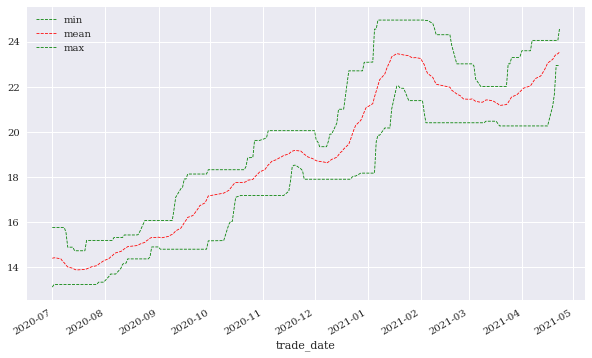

In [99]:
ax = data_sz[['min','mean','max']].iloc[-200:].plot(figsize=(10,6), style=['g--','r--','g--'],lw=0.8)#将滚动数据可视化

## 8.2.2 技术分析示例 （以上证指数为例）

### SMA

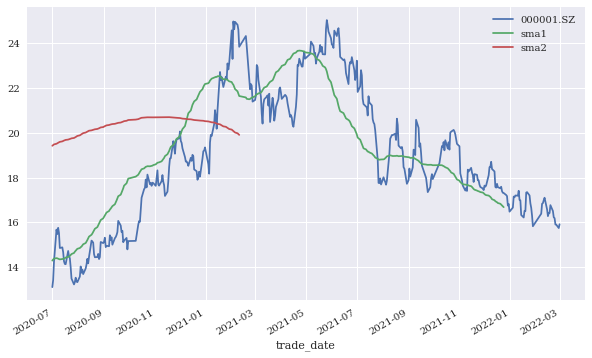

In [101]:
data_sz['sma1'] = data_sz['000001.SZ'].rolling(window=42).mean()
data_sz['sma2'] = data_sz['000001.SZ'].rolling(window=252).mean()
data_sz[['000001.SZ','sma1','sma2']].plot(figsize=(10,6))

### 金叉银叉策略 

In [108]:
data_sz.dropna(inplace=True)#只保留完整数据行
data_sz['position'] = np.where(data_sz['sma1']>data_sz['sma2'],
                              1,#买进股票
                              -1#卖出
                              )
data_sz.head()

,000001.SZ,min,mean,std,median,max,ewma,sma1,sma2,position
trade_date,,,,,,,,,,
2021-02-10,23.82,20.4,22.1070,1.023200,21.795,24.30,23.887316,21.628571,19.898571,1
2021-02-09,24.58,20.4,22.2530,1.155796,22.010,24.58,24.406829,21.731429,19.932937,1
2021-02-08,24.80,20.4,22.4130,1.275894,22.125,24.80,24.701707,21.837143,19.968849,1
2021-02-05,24.93,20.4,22.5855,1.372663,22.250,24.93,24.872927,21.938571,20.004683,1
2021-02-04,24.60,20.4,22.7520,1.406248,22.360,24.93,24.668232,22.029524,20.039167,1


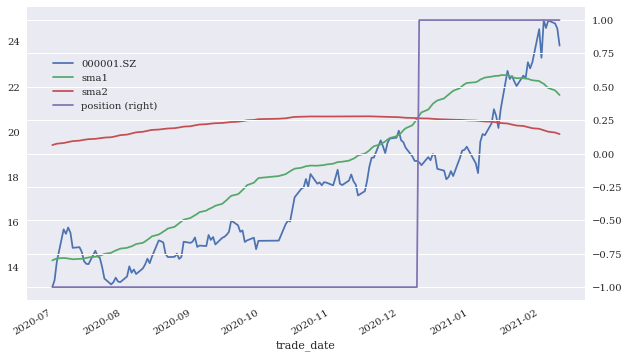

In [110]:
ax = data_sz[['000001.SZ','sma1','sma2','position']].plot(figsize=(10,6),secondary_y='position')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

# 8.3 相关分析 用上证指数和shibor为例

## 8.3.1读取数据 `

In [145]:
SH = pro.index_daily(ts_code='000001.SH', start_date='20180101', end_date='20220302')#上证指数
shibor = pro.shibor(start_date='20180101', end_date='20220302')#上海同业拆借

In [129]:
SH.head()
SH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     1010 non-null   object 
 1   trade_date  1010 non-null   object 
 2   close       1010 non-null   float64
 3   open        1010 non-null   float64
 4   high        1010 non-null   float64
 5   low         1010 non-null   float64
 6   pre_close   1010 non-null   float64
 7   change      1010 non-null   float64
 8   pct_chg     1010 non-null   float64
 9   vol         1010 non-null   float64
 10  amount      1010 non-null   float64
dtypes: float64(9), object(2)
memory usage: 86.9+ KB


In [130]:
shibor.head()
shibor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1018 non-null   object 
 1   on      1018 non-null   float64
 2   1w      1018 non-null   float64
 3   2w      1018 non-null   float64
 4   1m      1018 non-null   float64
 5   3m      1018 non-null   float64
 6   6m      1018 non-null   float64
 7   9m      1018 non-null   float64
 8   1y      1018 non-null   float64
dtypes: float64(8), object(1)
memory usage: 71.7+ KB


In [131]:
#根据日期将数据连接
index_shibor = SH.merge(shibor,left_on='trade_date',right_on='date')
index_shibor.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,date,on,1w,2w,1m,3m,6m,9m,1y
0,000001.SH,20220302,3484.1916,3478.2925,3486.6206,3466.9999,3488.8347,-4.6431,-0.1331,329367684.0,380143816.2,20220302,1.887,2.046,2.020,2.302,2.365,2.446,2.502,2.563
1,000001.SH,20220301,3488.8347,3471.3646,3491.1317,3465.7154,3462.3064,26.5283,0.7662,326001662.0,412562471.2,20220301,1.801,2.029,2.045,2.303,2.366,2.445,2.504,2.566
2,000001.SH,20220228,3462.3064,3450.3155,3462.3064,3425.5162,3451.4061,10.9003,0.3158,345838388.0,413804526.7,20220228,2.234,2.249,2.303,2.305,2.370,2.447,2.506,2.565
3,000001.SH,20220225,3451.4061,3445.3361,3480.1756,3440.9339,3429.9564,21.4497,0.6254,377542556.0,441659490.6,20220225,2.231,2.322,2.375,2.306,2.374,2.448,2.507,2.570
4,000001.SH,20220224,3429.9564,3474.3692,3486.9773,3400.2136,3489.1465,-59.1901,-1.6964,488354901.0,569794044.2,20220224,2.197,2.187,2.283,2.307,2.379,2.448,2.508,2.567


In [139]:
index_shibor=index_shibor.dropna()#去除有空值的行
data = pd.DataFrame()#把时间转化为datetime并且设置为索引
data['date'] = pd.to_datetime(index_shibor['date'])
data['SH_Index'] = index_shibor['close']
data['shibor_on'] = index_shibor['on']
data.index = data['date']

In [140]:
data = data.drop(['date'],axis=1)
data.head()

,SH_Index,shibor_on
date,,
2022-03-02,3484.1916,1.887
2022-03-01,3488.8347,1.801
2022-02-28,3462.3064,2.234
2022-02-25,3451.4061,2.231
2022-02-24,3429.9564,2.197


### 上证指数和shibor隔夜利率时间序列数据

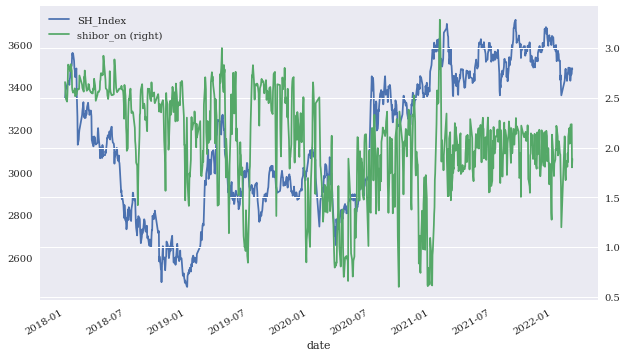

In [141]:
data.plot(secondary_y='shibor_on',figsize=(10,6))

## 8.3.3 OLS回归

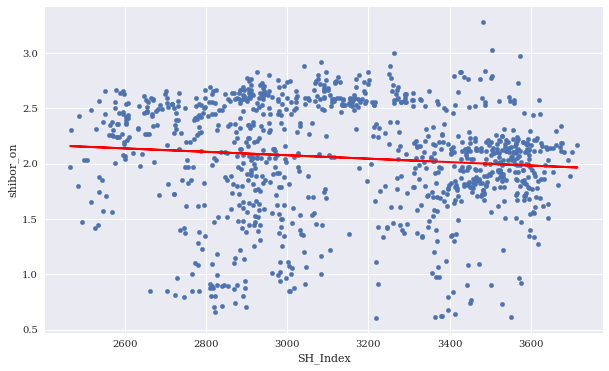

In [144]:
reg = np.polyfit(data['SH_Index'],data['shibor_on'],deg=1)#实施线性ols回归
ax = data.plot(kind='scatter',x='SH_Index',y='shibor_on',figsize=(10,6))#画散点图
ax.plot(data['SH_Index'],np.polyval(reg,data['SH_Index']),'r',lw=2)#添加回归线